
## Project: Finding Donors for *ABC Non-Profit* using supervised learning

### Overview:

In this project, we will employ several supervised algorithms to accurately model individuals' income, specifically whether an individual makes $50,000 or more. In a non-profit setting, by only targetting a specific group of customers, this helps to streamline/ reduce the number of marketing notifications to send to. This can also help the non-profit organization to better understand how large of a donation they may expect to receive.


### Data source:

This supervised learning project uses data collected from the 1994 U.S. Census, and it originates from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). There were some small changes to the original data set such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries. 

**This notebook uses Python 3**


----
## Exploring the Data
The code below imports the packages that will be used. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("C:\\Users\\Jackie\\Documents\\census.csv")

# Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [5]:
#Understand the different values of our target variable

list(data['income'].unique())

['<=50K', '>50K']

In [32]:
list(set(data.income))

['<=50K', '>50K']

In [229]:
list(set(data.education_level))

[' 1st-4th',
 ' Assoc-acdm',
 ' 9th',
 ' Assoc-voc',
 ' 7th-8th',
 ' HS-grad',
 ' Some-college',
 ' 10th',
 ' 11th',
 ' 12th',
 ' Doctorate',
 ' Masters',
 ' 5th-6th',
 ' Bachelors',
 ' Prof-school',
 ' Preschool']

In SQL:
select distinct income
from data

### First steps: Understand the target variable - whether or not an individual makes 50k or more
A quick exploration of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. Later, we create a list of unique values for each variable to get a sense of the categories for the dataset's categorical variables.

In [6]:
#Total number of records
n_records = len(data)

#Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])


# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/ (n_greater_50k + n_at_most_50k)*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))


Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


select count(*)
from data

select count(*)
from data 
where income = ">50k"

In [25]:
#list(data.workclass.unique())

[' State-gov',
 ' Self-emp-not-inc',
 ' Private',
 ' Federal-gov',
 ' Local-gov',
 ' Self-emp-inc',
 ' Without-pay']

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [161]:
#Always check what types your data are as you may need to convert numerical features from strings to integers or floats
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [232]:
# For fun - data exploration
# Doing groupbys, filters etc. and looking at averages, counts etc. are great ways to look at the data sliced and diced in different ways

da1 = data[data['sex'] == ' Male'].groupby(['education_level'])['hours-per-week'].mean().sort_values(ascending= False)
#filter(lambda x: x['hours-per-week'].mean() > 40)
da1 = pd.DataFrame(da1)



da1[da1['hours-per-week'] >= 40][:5]


#data[data['sex'] == ' Male'].groupby(['education_level'])['hours-per-week'].mean().sort_values(ascending = False)

,hours-per-week
education_level,
Prof-school,48.579425
Doctorate,47.612385
Masters,45.491525
Bachelors,44.256679
Assoc-voc,43.787383


In [ ]:
#SQL version
# create table hours_worked_by_education_level as
# select AVG(hours-per-week) limit 5
# from data
# where sex = 'male'
# group by education_level
# order by education_level desc
# having avg(hours-per_week) > 40

In [211]:
data[data['sex'] == ' Male'].groupby(['education_level'])['hours-per-week'].count()

education_level
 10th              832
 11th             1063
 12th              398
 1st-4th           166
 5th-6th           340
 7th-8th           626
 9th               489
 Assoc-acdm        922
 Assoc-voc        1284
 Bachelors        5240
 Doctorate         436
 HS-grad         10122
 Masters          1711
 Preschool          52
 Prof-school       661
 Some-college     6185
Name: hours-per-week, dtype: int64

In [209]:
ds1 = data[data['sex'] == ' Male'].groupby(['education_level']).filter(lambda x: len(x) > 500)
ds1[ds1['sex'] == ' Male'].groupby(['education_level'])['hours-per-week'].mean().sort_values(ascending = False)

education_level
 Prof-school     48.579425
 Masters         45.491525
 Bachelors       44.256679
 Assoc-voc       43.787383
 Assoc-acdm      43.624729
 HS-grad         42.913357
 Some-college    42.013258
 7th-8th         40.845048
 10th            39.903846
 11th            37.107244
Name: hours-per-week, dtype: float64

In [31]:
#This simple piece of code allows us to find the distributions of our continuous variables very quickly

data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


----
## Preprocessing the data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. 

Looking at the continuous variables, hours-per-week, age, capital-gain, capital-loss, and education-num, it seems that the '`capital-gain'` and `'capital-loss'` variables fit this description. 


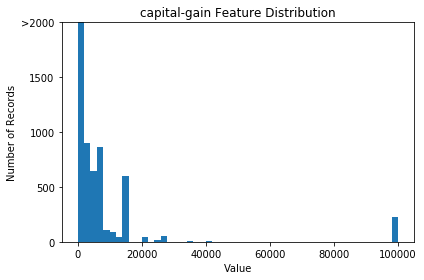

In [233]:
# Split the data into features and target label, VERY IMPORTANT step as the variable that you are trying to predict must be separate
# from the features that are being used to predict it

income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
#fig = plt.figure(figsize = (11,5));

def distribution(title1, dataset, data1, bin1):
    
    fig, ax = plt.subplots()

    #plot histogram
    ax.hist(dataset[data1], bins = bin1)
    
    # set title and labels
    ax.set_title(title1)
    ax.set_xlabel('Value')
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
    ax.set_ylabel('Number of Records')

    fig.tight_layout()
distribution('capital-gain Feature Distribution', data, 'capital-gain', 50)


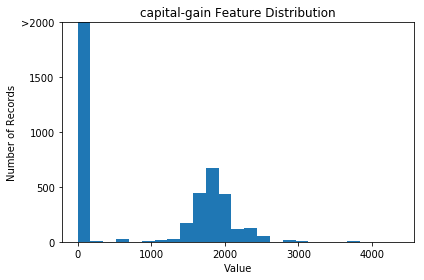

In [56]:
distribution('capital-gain Feature Distribution', data, 'capital-loss', 25)

### Log-transform the highly-skewed features

When dealing with highly-skewed feature distributions such as the variables `'capital-gain'` and `'capital-loss'`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. That being said, care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

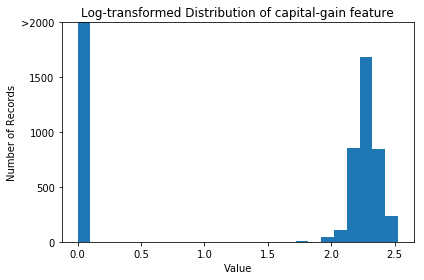

In [54]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution("Log-transformed Distribution of capital-gain feature", features_log_transformed, 'capital-gain', 25)
#vs.distribution(features_log_transformed, transformed = True)

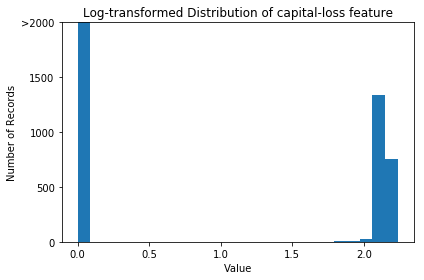

In [55]:
distribution("Log-transformed Distribution of capital-loss feature", features_log_transformed, 'capital-loss', 25)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is also good practice to normalize the numerical features such that each feature is treated equally when applying supervised learners. This prevents biases that may arise from outliers, while also preserving the shape of each feature's distribution.

In [57]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.855471,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

When exploring the data earlier, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (categorical features) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. 

One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `randomFeature` has three possible entries: `A`, `B`, or `C`. One then encodes this feature into `randomFeature_A`, `randomFeature_B` and `randomFeature_C`, and what happens is that each feature then ends up with a binary 1-0 variable. For example, in the feature `randomFeature_A`, a value of `1` would represent that this feature holds true for that particular records, and `0` when false.

Example:

highest-level-of-education - Bachelor, Masters, PHD


Convert to:

Bachelor - 1, 0

Masters - 1, 0

PHD - 1, 0

In addition to the non-numeric features, the income variable also needs to be converted into a binary 1-0 variable as well.

In [58]:
# One-hot encode the 'features_log_minmax_transform' data using pd.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)


# Encode the 'income_raw' data to numerical values, do not use get_dummies as it would create two columns of target values
#income = pd.get_dummies(income_raw)
income = income_raw.apply(lambda x: 1 if x =='>50K' else 0)
#income = pd.concat([income, income_1], axis=1)
#income = income.rename(index = str, columns= {"income": 0}) 

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [59]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


C:\Users\Jackie\Anaconda2\envs\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance


### Common metrics: Accuracy, Precision, Recall

In this particular scenario, we know individuals that make more than 50,000 are most likely to donate to this non-profit organization. Because of this, we want to predict who makes more than 50,000 accurately, and so therefore, **accuracy** is a good metric for evaluating these models' performance. 

Obviously, we want to identify donors accurately, as identifying a person whom does not make $50,000 or more per year as someone who does could be a waste of time for non-profits when they have limited resources in thinking about whom to reach out to.



Looking at the distribution of classes (those who make at most 50,000, and those who make more), it's clear most individuals do not make more than 50,000. Because of this class imbalance, this can greatly affect **accuracy**, since we could simply say *"this person does not make more than 50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. We employ the concept of a *naive prediction* for the data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than 50,000, we would identify no one as donors. 


#### Definitions of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

The Fbeta-score is a great way to take into consideration both the precision and recall in order to assess the effectiveness of a model.

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

###  Naive Predictor Performance

The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.



In [60]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(income)
FP = income.count() - TP

TN = 0
FN = 0

# TODO: Calculate accuracy, precision and recall
accuracy = TP/(TP + FP + TN + FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
b = 0.5
fscore = (1 + b**2)*(precision*recall)/(b**2*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {}, F-score: {}]".format(accuracy, fscore))



Naive Predictor: [Accuracy score: 0.2478439697492371, F-score: 0.29172913543228385]


###  Supervised Learning Models
**There are several supervised learning models that are currently available in sci-kit learn, which is the main package used for machine learning, though Keras, Pytorch or TensorFlow can also be used for ML, though they may be more suited to deep learning (neural networks etc.)

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

#### The models that will be used for this analysis will be Decision Trees, AdaBoost and Stochastic Gradient Descent.



Decision Trees
1) Decision trees can be applied to classification problems such as student admissions. Based on characteristics such as test scores, grades, participation in extracurricular activities etc., one can predict whether or not a student will get admitted.

2) The strengths of decision tree models is that they implicitly take into feature selection and screening for all categorical variables in the data set. This means that there is no need to choose which variables to split when using a decision tree, the model automatically chooses the split based on which feature maximizes information gain, and then splits again from there depending on the depth of the tree. Another advantage of decision tree models is that they are simple and easy to interpret as they are based on a set of rules (ex. male or female, income <= 50k or more than 50k etc.). Decision trees perform well when data points can split based on different features quite well (thereby maximizing information gain). For example, if one of the tree splits is based on the value of their home (ex. <=300k USD vs >300k USD), and we are trying to predict whether or not a person will earn 50k or more based on this feature, then because income is generally highly correlated the value of the home a person owns, then we would expect to see far more 50k+ income earners in the tree split in which the value of their home is >300k than if their income was less than 50k.

3) One major weakness of this model is that overfitting (high variance) can be an issue. The model performs poorly if the number of splits is too large (high depth of tree) because then it practically memorizes the training data due to a high number of rules being applied to determining the target variable value. It also on average performs more poorly compared to ensemble models such as AdaBoost or RandomForests as these models are able to optimize decision trees based on the aggregation of many different decision trees.

4) Decision trees are a good candidate for this model because decision trees are good at binary classification, as many of the features in this data set are categorical features such as gender, marital status etc.. 

Ensemble Methods - AdaBoost
1) Ensemble methods such as AdaBoost can be applied to any type of classification problems such as predicting customer churn (whether or not a customer leaves or not) or even for this problem where we are predicting persons whom earn 50k or more.

2) The strengths of AdaBoost models is that it combines weak learners from models such as decision trees to create more robust results. AdaBoost models work by sequentially introducing past weak learners (prior models) in order to compensate for the weaknesses in prediction accuracy of prior models by assigning greater weighting to misclassified points until it is classified correctly in later iterations. This helps to produce more accurate estimations of our response variable than in the decision trees model (in general) as the decision tree model (non-boosted) does not learn from past mistakes, it simply classifies based on whichever features provide the most information at each node of the tree. AdaBoost generally performs very well on any type of machine learning algorithm as it boosts the model by increasing accuracy of predictions on unusual observations.

3) AdaBoost can be sensitive to outliers and noisy data, and can perform poorly if there are too many outlier cases as learning from past iterations (weak learners) may not produce the desired results.

4) AdaBoost works very well on this classification problem (and in general for most problems) because it boosts an existing algorithm by adapting to its misclassified points in subsequent classifiers. The data set has many categorical variables to split on, and so AdaBoost can adapt constantly by learning from different iterations of splits on different features and then tweaking those classifiers in instances of misclassification to produce a better split/result. 

SGDC - Stochastic Gradient Descent
1) One real world application of deep learning problems such as neural networks. Techniques such as backpropogation often rely on stochastic gradient descent in order to get to the optimal convergence. Neural networks which use stochastic gradient descent techniques can be used for computer vision, recommender systems etc. 

2) SGDC works well because they are quick to implement and process as only a single training data point is processed at each iteration. It performs well for larger datasets as it can converge faster as it causes updates to the parameters more frequently, and because of frequent updates, steps taken toward minima of the loss have oscillations, which can get out of local minimas of the loss function. 

3) One disadvantage of SGDC is that it can perform poorly as oscillations of gradient descent can occur in different directions due to frequent updates. Steps toward the minima may be noisy, and this can result in longer time to achieve convergence of the minima of the loss function. 

4) SGDC works well in this case, because even though it can be computationally expensive to perform SGDC for one training point at a time, this is not too big of an issue as this data set is relatively small (only 45k data points and 103 features). Applying SGDC after learning the most important features can also help to reduce the number of features used to predict the response variable thereby speeding things up even further.

References:
Udacity lectures
https://medium.com/@sagar.rawale3/understanding-decision-tree-algorithm-drawbacks-and-advantages-4486efa6b8c3
https://www.cs.rit.edu/~rlaz/PatternRecognition/slides/churn_adaboost.pdf
https://hackernoon.com/under-the-hood-of-adaboost-8eb499d78eab
https://www.datacamp.com/community/tutorials/adaboost-classifier-python
http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost
https://www.analyticsindiamag.com/how-stochastic-gradient-descent-is-solving-optimisation-problems-in-deep-learning/
https://medium.com/@divakar_239/stochastic-vs-batch-gradient-descent-8820568eada1

### Implementation - Creating a Training and Predicting Pipeline

To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. 


In [62]:

from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    
    # Get the predictions on the test set(X_test) using the results from having fit the model using learner/algorithm earlier,
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5, average = 'macro')

    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5, average = 'macro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

### Initial Model Evaluation

The supervised learning taking place below will be for the default model with no bells and whistles.
Later, we will change some of the default parameters to ones that may produce better results.

In [63]:


# Import the three supervised learning models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the three models
#clf_A_1 = RandomForestClassifier() 
#clf_A_2 = BaggingClassifier() 
clf_A_3 = AdaBoostClassifier(random_state = 1)
clf_B = SGDClassifier(random_state=1)
clf_C = DecisionTreeClassifier(random_state = 1)
#clf_C = SVC(random_state=1, gamma='auto')

#  Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = int(round(len(y_train)))
samples_10 = int(round(len(y_train)/10))
samples_1 = int(round(len(y_train)/100))

# Collect results on the learners
results = {}
for clf in [clf_A_3, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)        
        

C:\Users\Jackie\Anaconda2\envs\python3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.


C:\Users\Jackie\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier trained on 362 samples.
SGDClassifier trained on 3618 samples.
SGDClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.


In [109]:
list(enumerate(results.keys()))

[(0, 'AdaBoostClassifier'),
 (1, 'SGDClassifier'),
 (2, 'DecisionTreeClassifier')]

In [234]:
results

{'AdaBoostClassifier': {0: {'train_time': 0.3148205280303955,
   'pred_time': 0.16527795791625977,
   'acc_train': 0.8966666666666666,
   'acc_test': 0.8102819237147595,
   'f_train': 0.8651562363810685,
   'f_test': 0.7407085301537482},
  1: {'train_time': 0.2178637981414795,
   'pred_time': 0.09194326400756836,
   'acc_train': 0.84,
   'acc_test': 0.849861802100608,
   'f_train': 0.7777771124736539,
   'f_test': 0.7958551061601835},
  2: {'train_time': 1.7909519672393799,
   'pred_time': 0.08095002174377441,
   'acc_train': 0.85,
   'acc_test': 0.8576008844665561,
   'f_train': 0.7952853598014888,
   'f_test': 0.8080301660829284}},
 'SGDClassifier': {0: {'train_time': 0.3145015239715576,
   'pred_time': 0.2070910930633545,
   'acc_train': 0.8066666666666666,
   'acc_test': 0.8007739082365948,
   'f_train': 0.7012816387816387,
   'f_test': 0.6954349392101211},
  1: {'train_time': 0.020984172821044922,
   'pred_time': 0.005995988845825195,
   'acc_train': 0.83,
   'acc_test': 0.8176893

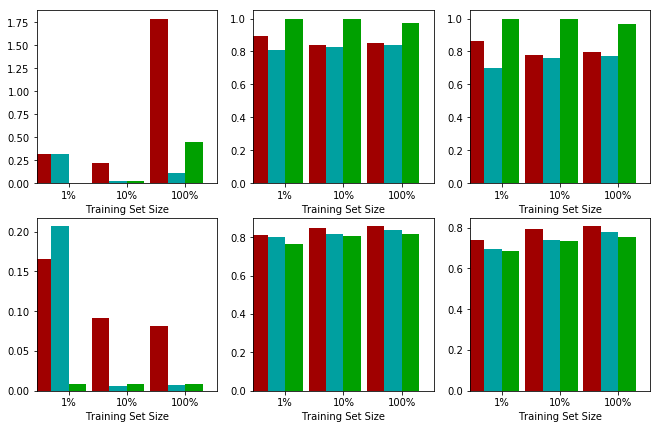

In [108]:
# Create figure
fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
bar_width = 0.3
colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot six panels of data
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
        for i in np.arange(3):
                
              # Creative plot code
            ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
            ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
            ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
            ax[j//3, j%3].set_xlabel("Training Set Size")
            ax[j//3, j%3].set_xlim((-0.1, 3.0))
            

In [135]:
import matplotlib.patches as mpatches

def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot six panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels since variables such as accuracy and the Fbeta scores are between 0 and 1
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)

    plt.show()

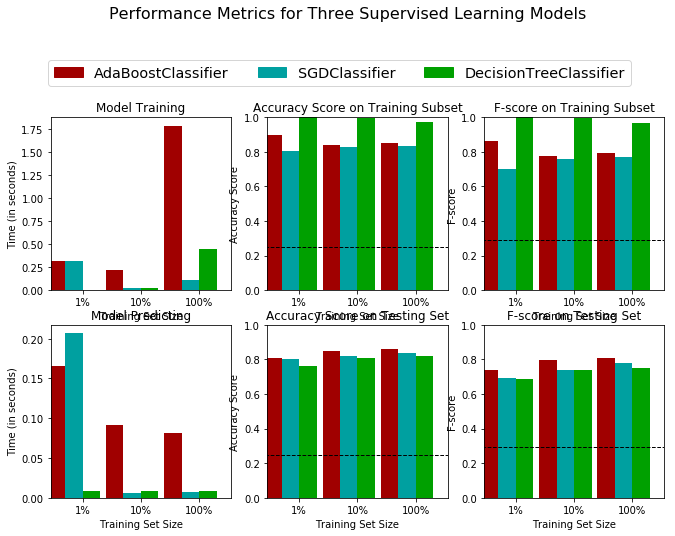

In [136]:
# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, we choose from the three supervised learning models the *best* model to use on the student data. Then, a grid search optimization for the model will be performed over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the Best Model




Clearly, AdaBoost is the most appropriate ML algorithm for identifying individuals that make more than $50,000.
The F-score and accuracy on the testing data is slightly higher than for decision trees and stochastic gradient descent (SGDC) on any given sample of the training data (whether one percent, ten percent or the entire sample set). The F-score on the test set using the AdaBoost algorithm is around 5-6 percent higher than the Decision tree algorithm for any given sample of the training set, and about 2 percent higher than that of the SGDC algorithm. Further, AdaBoost was selected and is suitable for the data because it does not overfit such as in the case of decision trees.

That being said, the model training and prediction times were longer by about 0.07 seconds as compared to the other algorithms, but this is insignificant, and still reasonably fast.


### What is AdaBoost?

Ensemble methods such as AdaBoost are a boosting algorithm that creates a strong classifier based on iteratively learning and combining the results of weak classifiers. An intial model (weak learner) is created by classifying points based on splits of the features in the training data (ex. male vs. female, married vs not married etc.), and then a second model attempts to correct the classification errors of the initial model. This process is done iteratively until the training set is predicted perfectly or the maximum number of models has been added.  Adaboost works by making predictions by calculating the weighted average of the weak classifiers. In the initial iteration/model, Adaboost works by assigning an initial weight of 1.0 to each point. The model then predicts whether those points are individuals earning 50k+ or <=50k. Once this is done, the misclassified points end up having their weights increased by a factor of the proportion of correctly classified to incorrectly classified points. Thus, a misclassified point would have a predicted value greater than +1.0.

In the second iteration/model, Adaboost would then classify those misclassified points from the first model correctly, though some other points that were correct before may be misclassified. The value of the correctly predicted points ends up being greater this time since a higher weight was assigned to those points which were previously misclassified in the first model, though the misclassified points in this second model/iteration still have a weight of 1.0 as they were never incorrect before. This means that the new weight (proportion of the value of the correctly predicted points versus those currently incorrect) ends up being even higher, and so the new weight assigned to those currently misclassified points will be higher.
The process repeats again on different models with the newly weighted predictions until the training set is either predicted perfectly or the max number of models has been added.
The prediction for the AdaBoost model is calculated as the sum of the weighted predictions for each model. If the sum is positive, then the first class (either >50k or <=50k earner) is predicted, if negative, the second class (different from the first class) is predicted.

### Model Tuning

- Initialize the classifier and store it in `clf`.
- Set a `random_state` 
- Create a dictionary of parameters you wish to tune for the chosen model.

- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [137]:

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


# Initialize the classifier
clf = AdaBoostClassifier(random_state = 1)

# Create the parameters list using a dictionary
# N_estimators is the number of decision trees, max_depth is the depth of the tree, learning_rate is the rate at which the algorithm progresses
parameters = {'n_estimators': [10, 20, 50, 100], 'base_estimator': [DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 4),  DecisionTreeClassifier(max_depth = 6)], 'learning_rate': [0.01, 0.1, 1, 2, 5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\Jackie\Anaconda2\envs\python3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8662
Final F-score on the testing data: 0.7507


### Final Model Evaluation


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8576         |    0.8662       |
| F-score        |    0.7246         |    0.7507       |


The accuracy of the optimized model only improved somewhat by aproximately 1% from 85.8% to 86.7%.
However, the F-score increased more significantly from 72.5% to 75% representing an impprovement of 2.5% for the optimized model compared to the unoptimized AdaBoost model. 

These results (both unoptimized and optimized) are significantly better than the poor results of the naive predictor model in Question 1, as the accuracy score was only 20% and the F-score was only 23.7%.

----
## Feature Importance

An important task when performing supervised learning on a dataset is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do and reduce the amount of time that it takes to run a model.

As we know from earlier, there are 103 features (originally 8 non-numeric features which were then categorized into around 90-100 dummy variables).


In [138]:
# Train the supervised model on the training set using .fit(X_train, y_train)
clf = AdaBoostClassifier(random_state = 1)
model = clf.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

In [152]:
indices = np.argsort(importances)[::-1]
X_train.columns.values[indices[:5]]

array(['capital-loss', 'age', 'capital-gain', 'hours-per-week',
       'education-num'], dtype=object)

In [156]:

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

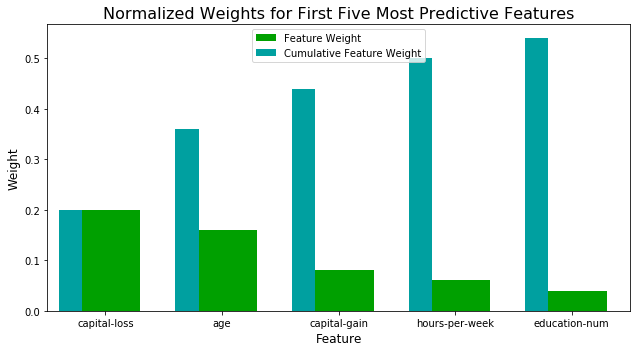

In [157]:
feature_plot(importances, X_train, y_train)

###  Extracting Feature Importance




Of the features that were predicted to be the most important, all but one variable (capital-loss) aligned with what I had predicted to be the five most important features in determining wheher an individual makes 50k+ or <=50k.

I had always thought that occupation would the most important, but then I realize that seniority may not have been taken into account in this variable. Senior administrators may make more than junior engineers even though engineering pays more than admin services. Capital losses were actually predicted to be the most important feature for for which had a significantly higher weight when compared to the other features. It kind of makes sense as capital losses directly negatively impact a person's income and whether or not one makes more than $50k per year.

In the end, age was the second most important feature (with a much higher weight when compared to the three other features that come after). This is more or less consistent with my predictions as I voted this to be the second most important feature. Similarly, hours-per-week, capital-gain and education-num were variables which I had selected to be the top five, and this is consistent with the results above.


### Feature Selection

In this section below, the model is now trained only on those five categorical features, which (from the visualization above) contribute more than half of the importance of all features present in the data. This simplification of the model will reduce running time required to train the model.


In [158]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8662
F-score on testing data: 0.7507

Final Model trained on reduced data
------
Accuracy on testing data: 0.8433
F-score on testing data: 0.7053


### Effects of Feature Selection

The reduced data using only five features performs almost as well as the model trained on full data, with only an accuracy that is 2.3% less an an F-score that is 4.5% less than that of the model trained on full data.

If training time was a factor, I would still use the full data as obtaining a higher accuracy and F-score (even if minimal) would still make a huge difference in obtaining info on suitable donors. Other learning models that train faster may still be considered before deciding to train with reduced data.